In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astroplan import Observer
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import EarthLocation
import statistics
from datetime import datetime
from astral.sun import sun
import julian

# from astral import Astral

ModuleNotFoundError: ignored

In [1]:
from google.colab import drive

drive.mount("content/drive")

ValueError: ignored

In [ ]:
# open file

## the sensor sets a day as from midnight to midnight so the code needs to read in two separate days of date
##

evening_time = []
morning_time = []

# celcius
evening_temp = []
morning_temp = []

evening_voltage = []
morning_voltage = []

evening_frequency = []
morning_frequency = []


evening_time1 = []
morning_time1 = []


## read in the text file for the first part of the night


## ***DO ONLY FOR OBSERVATIONS BEFORE MAY 8th !!!
# with open("2021-03-08_LENSSTSL0001_new.txt", 'w') as new_file:
#    with open("2021-03-08_LENSSTSL0001.txt") as file:
#        for line in file:
#            arr = ([line for line in line.split('\n') if line.strip()])
#            for a in arr:
#                if a != ['']:
#                    st = a
#                    new_file.write(st)
#                    new_file.write("\n")
# f1 = open("2021-03-08_LENSSTSL0001_new.txt", 'r')

f1 = open("2021-03-08_LENSSTSL0001.txt", "r")
lines = f1.readlines()

for x in lines:
    evening_time.append(str(x.split(",")[0]))
    evening_voltage.append(float(x.split(",")[1]))
    evening_frequency.append(int(x.split(",")[2]))
    evening_temp.append(float(x.split(",")[3]))


for m in range(len(evening_time)):
    evening_time1.append("2021-03-08T" + evening_time[m])


f1.close()


## read in the text file for the second part of the night


## ***DO ONLY FOR OBSERVATIONS BEFORE MAY 8th !!!
# with open("2021-03-09_LENSSTSL0001_new.txt", 'w') as new_file:
#    with open("2021-03-09_LENSSTSL0001.txt") as file:
#        for line in file:
#            arr = ([line for line in line.split('\n') if line.strip()])
#            for a in arr:
#                if a != ['']:
#                    st = a
#                    new_file.write(st)
#                    new_file.write("\n")
# f2 = open("2021-03-09_LENSSTSL0001_new.txt", 'r')

f2 = open("2021-03-09_LENSSTSL0001.txt", "r")
lines = f2.readlines()


for x in lines:
    morning_time.append(str(x.split(",")[0]))
    morning_voltage.append(float(x.split(",")[1]))
    morning_frequency.append(int(x.split(",")[2]))
    morning_temp.append(float(x.split(",")[3]))


for m in range(len(morning_time)):
    morning_time1.append("2021-03-09T" + morning_time[m])


## .append adds the data to the apropriat array
## for arrays that you will have to do math operations for later, you want to make sure that you specify what type of
##      alues you are adding to the array
##      python assumes the values are strings, but you can add 'float' or 'int'outside the (.split) to specify that these
##          numbers
## .slpit(';') tells the code to speparate the data values when there is a ;
##      sometimes the data is separated by commas so you would put (',')
##      or by spaces ('  ')
## the [#] tells to code which index to use for example: ####;###;###;####;##;###
##      would be indexed like [0];[1];[2];[3];[4];[5]
##      unlike with reading in the txt filepyhton indeces always start at 0, but they can go up to any number

f2.close()


## save the first date of the night's filename as a string and then extract the date of the first half of the night
##    as a separate string
evening = os.path.splitext(f1.name)[0]
evening_date = str(evening.split("_")[0])

## second half of night
morning = os.path.splitext(f2.name)[0]
morning_date = str(morning.split("_")[0])

In [ ]:
evening_mjd_time = []
morning_mjd_time = []

t = Time(evening_time1, format="isot", scale="local")
m1 = t.mjd

for m in range(len(evening_time1)):
    evening_mjd_time.append(m1[m])

t1 = Time(morning_time1, format="isot", scale="local")
m2 = t1.mjd

for m in range(len(morning_time1)):
    morning_mjd_time.append(m2[m])

In [ ]:
location1 = Observer(
    longitude=-88.5375518 * u.deg,
    latitude=42.587277 * u.deg,
    elevation=879 * u.m,
)

## these will need to be changed every time the code is run (Time('yyyy-mm-dd hh:mm:ss.sss'))
## generalize by using string of filename?
evening = (
    float(
        str(
            location1.twilight_evening_astronomical(
                Time("2021-03-08 19:00:54.000")
            )
        )
    )
    - 2400000.5
    - (6 * (0.5 / 12))
)
morning = (
    float(
        str(
            location1.twilight_morning_astronomical(
                Time("2021-03-09 03:00:54.000")
            )
        )
    )
    - 2400000.5
    - (6 * (0.5 / 12))
)
moon = float(str(location1.moon_illumination("2021-03-09 00:00:05.000")))
moon_phase = []
print(evening, morning, moon)

if moon == 0:
    moon_phase.append("New Moon")
elif (moon > 0) and (moon < 0.5):
    moon_phase.append("Cresent")
elif moon_phase == 0.5:
    moon_phase.append("Quarter")
elif (moon > 0.5) and (moon < 1):
    moon_phase.append("Gibbous")
elif moon_phase == 1:
    moon_phase.append("Full")


##  moon illumination and phase...
##    0 = new moon
##    0 - .5 = cresent
##   .5 = quarter
##  .501 - 1 = gibbous
##    1 = full moon
##   find moon rise and set times?

59281.810028804 59282.19606047217 0.19966432665381922


In [ ]:
#### finding SUNSET and SUNRISE
#### Generalize Later!!!


## find sunset and convert from MJD to standard
s1 = (
    float(
        str(
            location1.sun_set_time(
                Time("2021-03-08 15:00:00.000"), which="nearest"
            )
        )
    )
    - 2400000.5
    - (6 * (0.5 / 12))
)
s2 = julian.from_jd(s1, fmt="mjd")
sunset_24time = s2.strftime(("%H:%M"))
sunset_12time = s2.strftime("%m-%d-%y %I:%M %p")
# print(sunset_12time)
## sunrise
s3 = (
    float(
        str(
            location1.sun_rise_time(
                Time("2021-03-09 15:00:00.000"), which="nearest"
            )
        )
    )
    - 2400000.5
    - (6 * (0.5 / 12))
)
s4 = julian.from_jd(s3, fmt="mjd")
sunrise_24time = s4.strftime(("%H:%M"))
sunrise_12time = s4.strftime("%m-%d-%y %I:%M %p")


m1 = (
    float(
        str(
            location1.moon_rise_time(
                Time("2021-03-08 15:00:00.000"), which="nearest"
            )
        )
    )
    - 2400000.5
    - (6 * (0.5 / 12))
)
m2 = julian.from_jd(m1, fmt="mjd")
moonrise_24time = m2.strftime(("%H:%M"))
moonrise_12time = m2.strftime("%m-%d-%y %I:%M %p")
print(moonrise_12time)

m3 = (
    float(
        str(
            location1.moon_set_time(
                Time("2021-03-09 15:00:00.000"), which="nearest"
            )
        )
    )
    - 2400000.5
    - (6 * (0.5 / 12))
)
m4 = julian.from_jd(m3, fmt="mjd")
moonset_24time = m4.strftime(("%H:%M"))
moonset_12time = m4.strftime("%m-%d-%y %I:%M %p")
print(moonset_12time)

03-08-21 03:55 AM
03-09-21 01:48 PM


In [ ]:
local_time = []
mjd_time = []
temp = []
voltage = []


mjd_evening1 = []
evening_frequency1 = []

evening_temp1 = []
morning_temp1 = []


evening_voltage1 = []
morning_voltage1 = []

mjd_morning1 = []
morning_frequency1 = []

local_time1 = []
local_time2 = []

for i in range(len(evening_mjd_time)):
    if evening_mjd_time[i] >= evening:
        mjd_evening1.append(evening_mjd_time[i])
        evening_frequency1.append(evening_frequency[i])
        local_time1.append(evening_time[i])
        evening_temp1.append(evening_temp[i])
        evening_voltage1.append(evening_voltage[i])
        # feb26a_local.append(feb26_local[i])


for i in range(len(morning_mjd_time)):
    if morning_mjd_time[i] <= morning:
        mjd_morning1.append(morning_mjd_time[i])
        morning_frequency1.append(morning_frequency[i])
        local_time2.append(morning_time[i])
        morning_temp1.append(morning_temp[i])
        morning_voltage1.append(morning_voltage[i])


frequency = evening_frequency1 + morning_frequency1
mjd_time = mjd_evening1 + mjd_morning1
local_time = local_time1 + local_time2
temp = evening_temp1 + morning_temp1
voltage = evening_voltage1 + morning_voltage1

local_12time = []

# frequency =  np.array(frequency)
# mjd_time = np.array(mjd_time)


# convert local_time array from strings in 24 time to string objects in 12 hour time
for i in range(len(local_time)):
    x1 = local_time[i]
    x2 = datetime.strptime(x1, "%H:%M:%S")
    local_12time.append(x2.strftime("%I:%M %p"))

# print(local_time[0],local_time[10],local_time[20],local_time[30],local_time[40],local_time[50])
# print(local_12time[0],local_12time[10],local_12time[20],local_12time[30],local_12time[40],local_12time[50])

In [ ]:
# print(local_time)
min_frequency = float(min(frequency))
y_min = min_frequency - 10

max_frequency = float(max(frequency))
y_max = max_frequency + 10


mean_freq = str(round((sum(frequency) / len(frequency)), 2))
median_freq = str(round(statistics.median(frequency), 2))

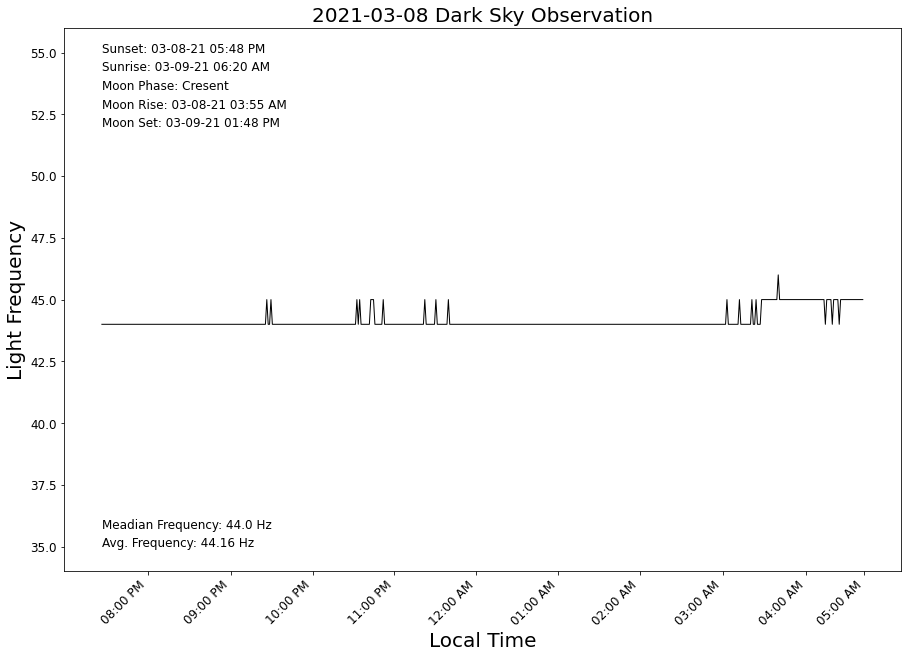

In [ ]:
# plt.figure(figsize=(15,10))
# plt.plot(mjd_time,frequency,color='k', linewidth = 1)
##plt.xticks(['21:00:05.000','00:00:05.000','03:00:05.000'])
# plt.xticks(rotation = 45,ha = 'right')
##plt.axhline(np.mean(feb26a_msas),linestyle = '--')
##plt.text(min())
# plt.ylim(0,60)
# plt.show()


plt.figure(figsize=(15, 10))
plt.plot(local_12time, frequency, color="k", linewidth=1)
# plt.xticks(local_time, values)
# plt.xticks(['21:00:01','00:00:01','03:00:00'],fontsize = 12)

plt.xticks(
    [
        "08:00 PM",
        "09:00 PM",
        "10:00 PM",
        "11:00 PM",
        "12:00 AM",
        "01:00 AM",
        "02:00 AM",
        "03:00 AM",
        "04:00 AM",
        "05:00 AM",
    ],
    fontsize=12,
)
plt.xticks(rotation=45, ha="right")
plt.yticks(fontsize=12)
plt.title(evening_date + " Dark Sky Observation", fontsize=20)
plt.xlabel("Local Time", fontsize=20)
plt.ylabel("Light Frequency", fontsize=20)
plt.ylim(y_min, y_max)
plt.text(local_12time[0], y_max - 1, "Sunset: " + sunset_12time, fontsize=12)
plt.text(
    local_12time[0], y_max - 1.75, "Sunrise: " + sunrise_12time, fontsize=12
)
plt.text(
    local_12time[0], y_max - 2.5, "Moon Phase: " + moon_phase[0], fontsize=12
)
plt.text(
    local_12time[0], y_max - 3.25, "Moon Rise: " + moonrise_12time, fontsize=12
)
plt.text(local_12time[0], y_max - 4, "Moon Set: " + moonset_12time, fontsize=12)
plt.text(
    local_12time[0],
    y_min + 1,
    "Avg. Frequency: " + mean_freq + " Hz",
    fontsize=12,
)
plt.text(
    local_12time[0],
    y_min + 1.75,
    "Meadian Frequency: " + median_freq + " Hz",
    fontsize=12,
)
plt.show()
## TO DO: save plt as png

# plt.figure(figsize=(15,10))
# lt.plot(mjd_time,temp,color='k', linewidth = 1)
# plt.xticks(['21:00:05.000','00:00:05.000','03:00:05.000'])
# plt.xticks(rotation = 45,ha = 'right')
# plt.axhline(np.mean(feb26a_msas),linestyle = '--')
# plt.text(min())
# plt.ylim(0,60)
# plt.show()

In [ ]:
#### upload plot png to